# Question 2:  How Effective are Elo Ratings in Predicting Game Outcomes?
## Assignment:  Final Project Deliverable
### Group Members:  Miguel Avila, Genna Moellering, Shaorui Pi 

## Overview
For this question, our team is evaluating the accuracy of the NFL's Elo rating system, which is designed to assess teams' relative skill level and predict game outcomes based on previous wins and losses. The following is a brief summary of what we did to meet each part of the assignment. 

### Cleaning Data 
To answer this question, we only needed to use one dataset ('nfl_elo.csv' at https://projects.fivethirtyeight.com/nfl-api/nfl_elo.csv). Although we used this same dataset in Question 1, Question 2 required that we use much more of the dataset, which is why we cleaned it in a separate Jupyter Notebook. We used the 'parse_dates' function when reading in the file to change our 'date' datatype to datetime64. We then dropped 17 columns that were either irrelevant to our question or largely contained missing data. We dropped all rows that did not meet a threshold of 16 non-null values, which eliminated all data before 1950, which is when the dataset begins trakcing quarterback Elo ratings. From there, we added some columns, including some that were categorical, which we needed to perform the type of analysis we needed to answer the question.

### Visualizations
We created two visualizations that will help us answer our subquestions. The first is a line graph that shows the number of games per season that the Elo rating correctly predicts and the number of games the Elo incorrectly predicts. The second is a countplot that shows how the Elo rating's certainty level (the degree to which the probability rating favored a given team) compares to the Elo's success score.

### Question Refinement
Based on our exploration of the dataset, we refined our subquestions from the first assignment as follows:

(a) How effective is the Elo rating in predicting accurate game outcomes?

(b) To what degree does the certainty level of the Elo's prediction affect the rating's accuracy?

### References
 - https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
 - https://stackoverflow.com/questions/31460146/plotting-value-counts-in-seaborn-barplot
 - Lecture 3 - Data Wrangling I Slides
 - Lecture 4 - Data Wrangling II Slides
 - Lecture 6 - Categorical Data Slides
 - https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
 - https://medium.com/purple-theory/what-is-elo-rating-c4eb7a9061e0
 - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html
 - https://stackoverflow.com/questions/33149428/modify-the-legend-of-pandas-bar-plot
 - https://datascience.stackexchange.com/questions/90355/how-can-i-get-rid-of-the-white-space-in-matplotlib
 - Python Data Science Handbook - 3.08 and 3.09
- [https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
- [https://datagy.io/pandas-groupby/](https://datagy.io/pandas-groupby/)
- [https://towardsdatascience.com/ultimate-pandas-guide-mastering-the-groupby-104306251739](https://towardsdatascience.com/ultimate-pandas-guide-mastering-the-groupby-104306251739)
- [https://pbpython.com/groupby-agg.html](https://pbpython.com/groupby-agg.html)
- https://medium.com/purple-theory/what-is-elo-rating-c4eb7a9061e0
- https://colorbrewer2.org/#type=sequential&scheme=Greens&n=3

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Reading in our csv file using parse_dates to to change our 'date' datatype to datetime64

In [2]:
elo = pd.read_csv('https://projects.fivethirtyeight.com/nfl-api/nfl_elo.csv', parse_dates=['date'])

There were 17 columns in our dataset that were either irrelevant to our question or contained mostly null values, so we dropped them.

In [3]:
elo.drop(columns=['neutral', 'playoff', 'elo1_post', 'elo2_post', 'qb1', 'qb2', 'qb1_value_pre', 'qb2_value_pre', 'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post', 'qbelo2_post', 
                 'quality', 'importance', 'total_rating'], inplace=True)

The NFL did not start keeping track of Elo ratings based on quarterback data until 1950, so every game before that season was missing that data. We established a threshhold of 16 columns, the number of columns in our dataset, to drop all the data before quarterback Elo ratings were recorded.

In [4]:
elo.dropna(thresh=16, inplace=True)

We also reindexed the dataframe based on date.

In [5]:
elo.index=elo.date

We then created a column that would tell us whether the Elo's team probability rating for each game was correct (i.e. predicted the winner correctly) or incorrect. We used boolean values to do this. 

In [6]:
conditions = [(elo['elo_prob1'] > elo['elo_prob2']) & (elo['score1'] > elo['score2']), 
              (elo['elo_prob2'] > elo['elo_prob1']) & (elo['score2'] > elo['score1']),
              (elo['elo_prob1'] < elo['elo_prob2']) & (elo['score1'] > elo['score2']),
              (elo['elo_prob2'] < elo['elo_prob1']) & (elo['score2'] > elo['score1'])]
values = [True, True, False, False]
elo['team_rating_correct'] = np.select(conditions, values)
elo[['team1', 'team2', 'elo_prob1', 'elo_prob2', 'score1', 'score2', 'team_rating_correct']].sample(5)

,team1,team2,elo_prob1,elo_prob2,score1,score2,team_rating_correct
date,,,,,,,
1969-09-28,GB,SF,0.719123,0.280877,14.0,7.0,1
2014-12-28,KC,LAC,0.567626,0.432374,19.0,7.0,1
1995-09-17,CAR,LAR,0.378928,0.621072,10.0,31.0,1
2000-11-26,LAC,KC,0.372234,0.627766,17.0,16.0,0
1959-10-11,DET,IND,0.416615,0.583385,24.0,31.0,1


We then created our own category to classify the Elo's team rating as either 'correct' or 'incorrect'.

In [7]:
elo['team_rating_accuracy'] = pd.cut(elo.team_rating_correct, bins=[0, 1, 2], labels=['Incorrect', 'Correct'], right=False)

We also created a column to show the 'confidence level' of the probability ratings. We did this by taking the probability percentage of the losing team and subtracting it from the probability percentage of the winning team. The larger the differential, the more confident the Elo rating was in its assessment that one team would win over the other.

In [8]:
conditions = [(elo['elo_prob1'] > elo['elo_prob2']), (elo['elo_prob2'] > elo['elo_prob1'])]
values = [((elo['elo_prob1']-elo['elo_prob2']).round(3))*100, ((elo['elo_prob2']-elo['elo_prob1']).round(3))*100]
elo['team_confidence_level'] = np.select(conditions, values)
elo[['team1', 'team2', 'elo_prob1', 'elo_prob2', 'score1', 'score2', 'team_rating_correct', 
     'team_rating_accuracy', 'team_confidence_level']].sample(5)

,team1,team2,elo_prob1,elo_prob2,score1,score2,team_rating_correct,team_rating_accuracy,team_confidence_level
date,,,,,,,,,
1981-10-05,PHI,ATL,0.699170,0.300830,16.0,13.0,1,Correct,39.8
1963-12-22,OAK,TEN,0.668652,0.331348,52.0,49.0,1,Correct,33.7
2015-11-01,CHI,MIN,0.370844,0.629156,20.0,23.0,1,Correct,25.8
1951-11-11,NYG,WSH,0.825618,0.174382,28.0,14.0,1,Correct,65.1
2017-12-14,IND,DEN,0.510238,0.489762,13.0,25.0,0,Incorrect,2.0


We generated a second category column to classify these confidence levels into 'certainty range' categories.

In [9]:
elo['certainty_range'] = pd.cut(elo.team_confidence_level, bins=[0, 10, 25, 50, 75, 100], 
                                labels = ['0-10','10-25','25-50','50-75','75-100'], right=False)
elo[['team1', 'team2', 'elo_prob1', 'elo_prob2', 'score1', 'score2', 'team_rating_correct', 
     'team_rating_accuracy', 'team_confidence_level', 'certainty_range']].sample(5)

,team1,team2,elo_prob1,elo_prob2,score1,score2,team_rating_correct,team_rating_accuracy,team_confidence_level,certainty_range
date,,,,,,,,,,
2000-11-12,DAL,CIN,0.721668,0.278332,23.0,6.0,1,Correct,44.3,25-50
1953-12-05,LAR,IND,0.914383,0.085617,45.0,2.0,1,Correct,82.9,75-100
1957-11-17,NYG,PHI,0.781455,0.218545,13.0,0.0,1,Correct,56.3,50-75
2012-11-25,LAC,BAL,0.362167,0.637833,13.0,16.0,1,Correct,27.6,25-50
1992-11-29,LAR,MIN,0.365652,0.634348,17.0,31.0,1,Correct,26.9,25-50


Using this data, we can use a catplot to get a feel for how the Elo's accuracy rating improves as its certainty rating gets higher. As expected, the Elo rating gets progressively more accurate as its confidence level increases. 

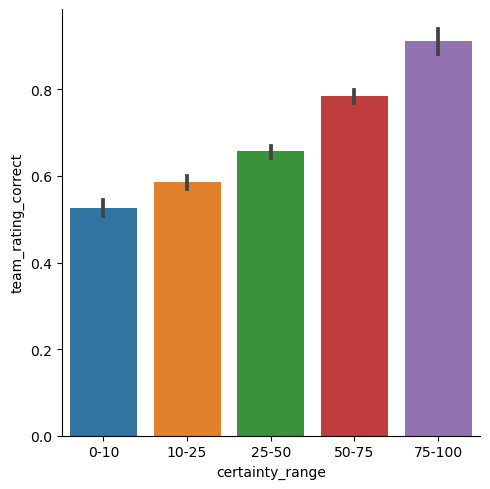

In [10]:
sns.catplot(data=elo, x='certainty_range', y='team_rating_correct', kind='bar')
plt.show()

Referencing our datatypes, our two categoircal columns and our date column appear to be properly classified.

In [11]:
elo.dtypes

date                     datetime64[ns]
season                            int64
team1                            object
team2                            object
elo1_pre                        float64
elo2_pre                        float64
elo_prob1                       float64
elo_prob2                       float64
qbelo1_pre                      float64
qbelo2_pre                      float64
qb1_adj                         float64
qb2_adj                         float64
qbelo_prob1                     float64
qbelo_prob2                     float64
score1                          float64
score2                          float64
team_rating_correct               int64
team_rating_accuracy           category
team_confidence_level           float64
certainty_range                category
dtype: object

Running the aggregation for mean on the 'team_rating_correct' column gives us percentage for how often the Elo rating was correct in predicting the game outcome - 64.7%. Looks like Elo is a pretty good indicator!

In [12]:
elo.team_rating_correct.mean()

0.6472765732416711

The value counts for each category give us a better idea of how often the Elo is correct or incorrect at each confidence level. While the Elo rating does the best when the confidence level is above 75%, there aren't very many games where the certainty level is that high. The Elo rating is much more reliable at any confidence level above 25%.  

In [13]:
elo.groupby('certainty_range')['team_rating_correct'].value_counts()

certainty_range  team_rating_correct
0-10             1                      1407
                 0                      1266
10-25            1                      2207
                 0                      1564
25-50            1                      3520
                 0                      1840
50-75            1                      2300
                 0                       631
75-100           1                       358
                 0                        35
Name: team_rating_correct, dtype: int64

Using a countplot, we were able to show clearly that the Elo rating not nearly as reliable at < 10%, as the number of correct and incorrect games is roughly the same. The information from the value_count() function above is also easily visualized here.

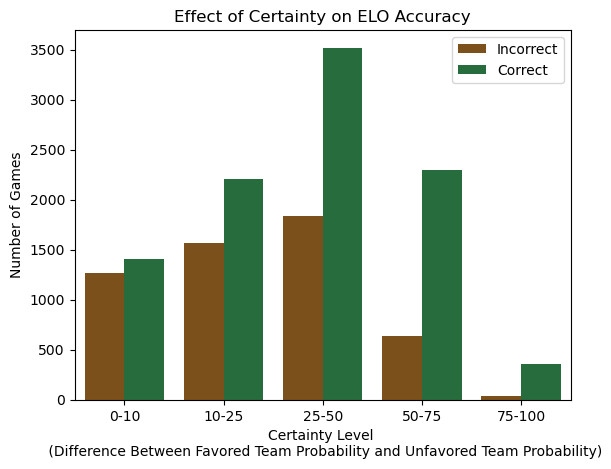

In [14]:
sns.countplot(data=elo, x='certainty_range',
              hue='team_rating_accuracy',
              palette={'Correct':'#1b7837', 'Incorrect':'#8c510a'}).set(title="Effect of Certainty on ELO Accuracy")
plt.legend(['Incorrect', 'Correct'])
plt.ylabel("Number of Games")
plt.xlabel("Certainty Level \n (Difference Between Favored Team Probability and Unfavored Team Probability)")
plt.show()

We also wanted to visualize how the Elo rating performed over time. We started by grouping our elo rating by season and team rating accuracy.

In [15]:
elo_season = elo.groupby(['season', 'team_rating_accuracy']).agg(accuracy = pd.NamedAgg(column = 'team_rating_accuracy', aggfunc='count'))
elo_season

accuracy
season team_rating_accuracy          
1950   Incorrect                   23
       Correct                     58
1951   Incorrect                   31
       Correct                     42
1952   Incorrect                   29
...                               ...
2020   Correct                    175
2021   Incorrect                  118
       Correct                    167
2022   Incorrect                   77
       Correct                    118

[146 rows x 1 columns]

We changed our graph to an line graph that shows how the Elo rating accuracy improves over time with some anomolies in 1958 and 1982. These timeframes provide room for further exploration on why spikes and dips in Elo accuracy occurred during those times.

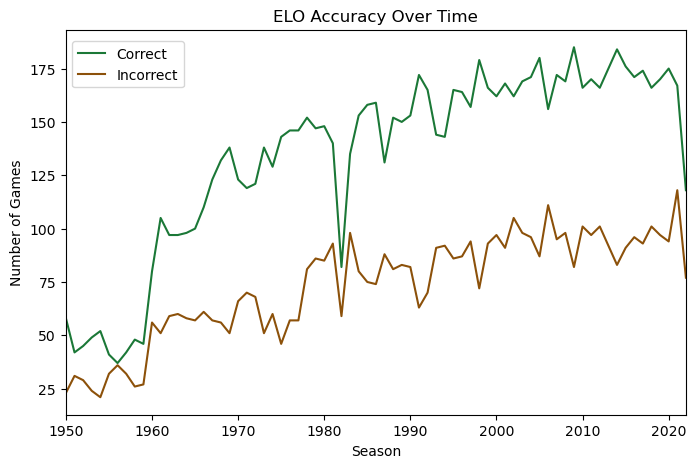

In [16]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html
#https://stackoverflow.com/questions/33149428/modify-the-legend-of-pandas-bar-plot
#https://datascience.stackexchange.com/questions/90355/how-can-i-get-rid-of-the-white-space-in-matplotlib
time_elo =  elo_season.unstack(level=-1)
time_elo = time_elo.iloc[:,[1,0]]

ax = time_elo.plot(kind='line', figsize=(8,5), stacked=False, 
color={('accuracy', 'Correct'):'#1b7837', ('accuracy', 'Incorrect'):'#8c510a'}, title='ELO Accuracy Over Time')
ax.legend(['Correct', 'Incorrect'])
ax.set_ylabel("Number of Games")
ax.set_xlabel('Season')
ax.margins(x=0)
h,l = ax.get_legend_handles_labels()
ax.legend(h[:2],["Correct", "Incorrect"], loc=(.01,.85), fontsize=10)
plt.show()